In [6]:
from google.colab import files
uploaded = files.upload()


Saving DataCreation.csv to DataCreation (1).csv


   Unnamed: 0  years_of_experience  aerodynamics_score  technological_score  \
0           0                    4                  45                   10   
1           1                    6                  29                    7   
2           2                    8                  34                    9   
3           3                    5                  50                    9   
4           4                    4                  19                    8   

   Leader  Leadership_score  distance  route_match  fuel_consumption  \
0       1               540       668           76                71   
1       0               369       870           68               103   
2       0               443       507           95                60   
3       1               588       970           53                43   
4       0               266       841           31                54   

   engine_temperature  body_weight  sensor_equipped  
0                  37         1566    

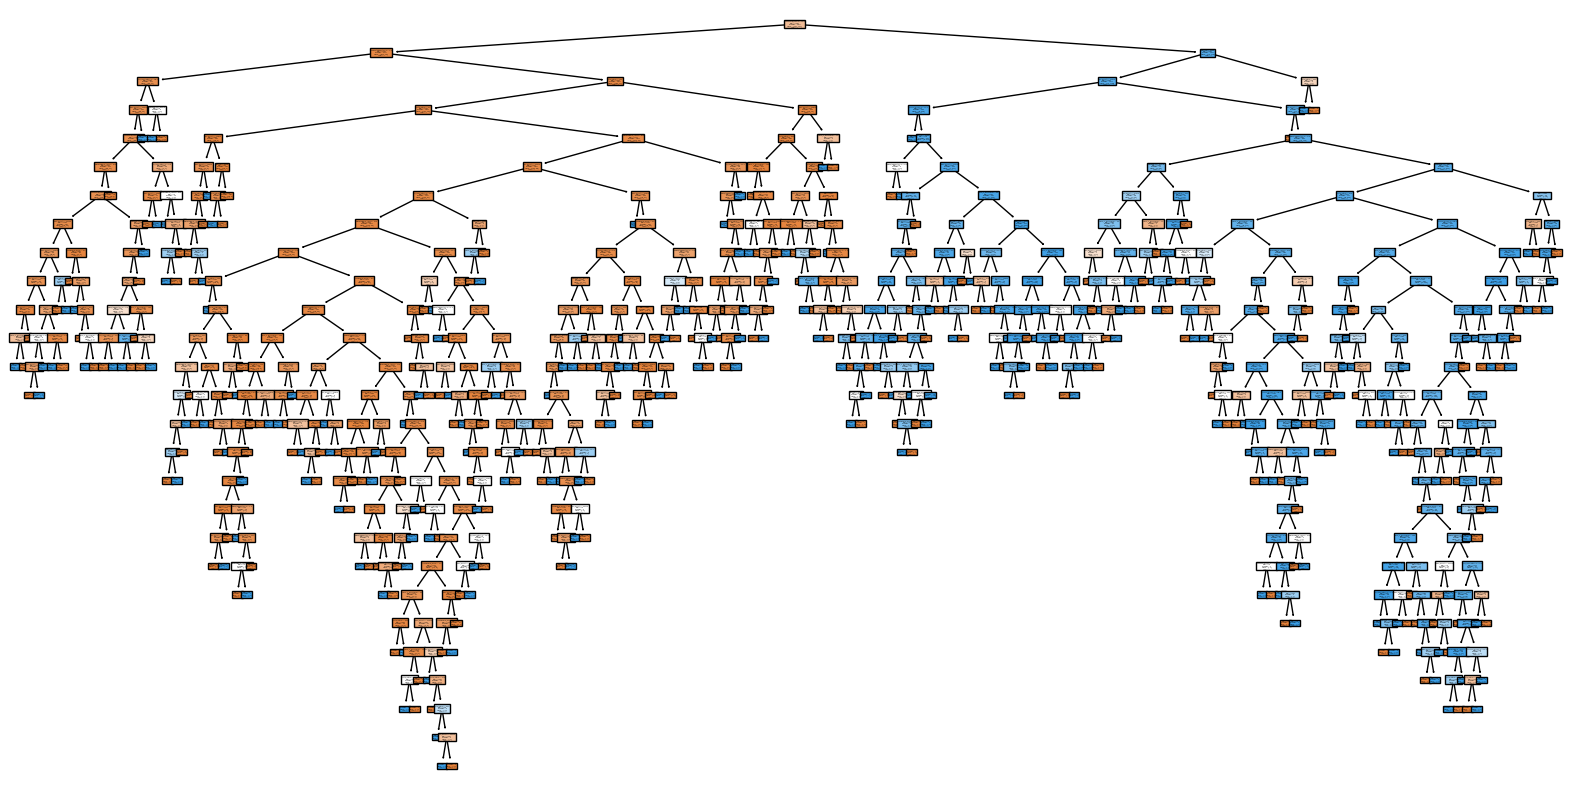

In [8]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from google.colab import files

# Load the new dataset
data = pd.read_csv('DataCreation.csv')  # Update the filename as necessary

# Check the first few rows to understand the data structure
print(data.head())

# Use only numeric columns for simplicity
data = data.select_dtypes(include=[float, int])  # Use only numbers

# Check if the target column 'Leader' exists, adjust accordingly
if 'Leader' in data.columns:
    X = data.drop('Leader', axis=1)  # Features
    y = data['Leader']  # Target
else:
    raise ValueError("The target column 'Leader' does not exist in the dataset.")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(cl) for cl in y.unique()])
plt.show()
